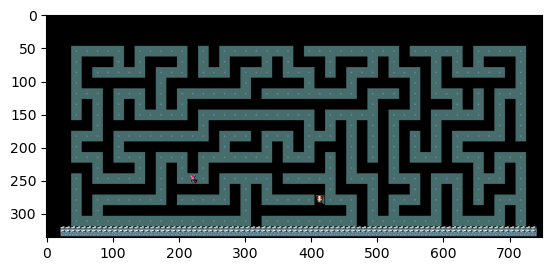

In [66]:

import time

import gym
from matplotlib import pyplot as plt

# from utils.utils import get_target_location, get_player_location, get_valid_moves
# Create the MiniHack environment
env = gym.make(
    "MiniHack-MazeWalk-Mapped-45x19-v0",
    observation_keys=("chars", "pixel"),
)


# Reset the environment to get the initial observation
state = env.reset()
game_map = state['chars']
plt.imshow(state['pixel'][:, 250:1000, :])

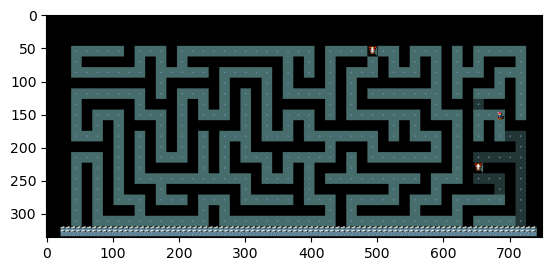

In [105]:
res = env.step(0)

plt.imshow(res[0]['pixel'][:, 250:1000, :])

In [31]:
# Enable interactive plot
%matplotlib notebook
import matplotlib.pyplot as plt
 
im = plt.imshow(state['pixel'][:, 250:1000, :])
def update(im, data):
    im.set_data(data['pixel'][:, 250:1000, :])
    # NOTE: there is no .set_data() for 3 dim data...
    plt.draw()
    plt.pause(0.001)  # Note this correction

res = env.step(0)
data = res[0]
update(im, data)


res = env.step(0)
data = res[0]
update(im, data)

In [82]:
import pandas as pd
df = pd.read_csv('results2.csv', index_col=0)
# df.sort_values(by=['path_length'], ascending=True, inplace=True)
# df = df[df['maze'] == 'MiniHack-MazeWalk-Mapped-45x19-v0_1']
df.head(100)

,name,time_mean,time_std,explored_mean,explored_std,path_length_mean,path_length_std
0,ASTAR-Chebysev-Env1,0.019454,0.024294,197.3,121.834177,93.4,66.171830
1,ASTAR-Chebysev-Env2,0.016464,0.021212,40.1,25.770138,22.3,12.419071
2,ASTAR-Chebysev-Env3,0.016596,0.023921,13.0,7.944250,9.1,4.254409
3,ASTAR-EUCLIDEAN-Env1,0.019090,0.021408,195.2,122.342688,93.4,66.171830
4,ASTAR-EUCLIDEAN-Env2,0.035336,0.079566,38.3,24.957965,22.3,12.419071
5,ASTAR-EUCLIDEAN-Env3,0.018776,0.030307,12.4,7.791734,9.1,4.254409
6,ASTAR-Manhattan-Env1,0.031597,0.061388,192.4,122.341235,93.4,66.171830
7,ASTAR-Manhattan-Env2,0.017361,0.023280,37.3,25.586672,22.3,12.419071
8,ASTAR-Manhattan-Env3,0.016306,0.021710,11.6,7.791734,9.1,4.254409
9,ASTAR-SManhattan-Env1,0.018370,0.022877,170.3,115.299658,93.4,66.171830


In [104]:


maze = """
-----------------------------------------------------------------------------------------------------
|.|.........|...|...........|.........|...........|.....|.................|.................|.......|
|.-------.-.---.-.---.-----.-.-------.-.---------.-.-.---.---------.-----.-.-----------.-----.-----.|
|.......|.|...|.....|.|...|...|.|.....|.|.......|...|.........|...|.|.....|.|.......|.|...........|.|
|------.-.---.-----.-.-.-.-----.-.-----.-.-.---.-------------.-.-.-.-.-----.-----.-.-.-----.-------.|
|.....|...|.|.....|.|...|...|...|.....|.|.|.|...|.|.......|.....|.|.|.|.....|...|.|...|...|...|.....|
|.---.-----.-----.-.-------.-.-------.-.---.-.---.-.-----.---------.-.-.-----.-.-.-----.-.---.-.---.|
|...|...........|.|.|...|...|.......|.|.|...|.|...|...|...|.....|...|.|.|.....|.|.|.....|...|.|...|.|
|--.-----------.-.-.-.-.-.---.-.-----.-.-.---.---.---.-.---.---.-.---.-.-----.-.-.-.-------.-----.-.|
|...|.........|...|.|.|.|.|...|.......|...|.|.......|.|...|.|.|...|.|.|...|...|...|...|...|.|...|.|.|
|.---.-------.-----.-.---.-.---------------.---.-----.---.-.-.-----.-.---.-.-----.---.-.---.-.-.-.-.|
|.....|.....|...|.|.|.|...|.|.................|.|.....|.....|...|...|...|.|.|...|.|.|.|...|.|.|...|.|
|------.---.---.-.-.-.-.---.-----.---------.-.-.-.-----------.---.-.---.-.-.-.---.-.-.-.-.-.-.------|
|...|...|...|.|.|.|.|.|.|.......|.|.........|.|.|.......|...|.|...|.....|...|.......|.|.|...|.|.....|
|.-.---.-.---.-.-.-.-.-.-------.---.---.-------.-------.-.-.-.-.-------------------.-.-----.-.-.---.|
|.|.....|.....|.|...|.|...|.|...|...|.|.|.......|...|...|.|...|.|.................|.|.....|.|.|.|.|.|
|.-----.-------.-.---.---.-.-.---.---.-.-.-------.-.-.---.---.-.-------.---------.-.-----.-.-.-.-.-.|
|.|.....|.......|.....|...|.......|.....|.|.......|.|...|.|...|.......|...|...|...|.|.....|.|.....|.|
|.-------.-------.-----.-------.---------.-----.-.-.---.-.---.-------.---.-.-.-.-----.-----.-----.-.|
|.........|.....|.|.....|.....|.|.......|.....|.|.|.|...|...|...|.....|...|.|.|.....|.....|.|...|.|.|
|.---------.---.---.-----.---.---.-----.-----.---.---.-----.-----.-----.-----.-----.-----.-.-.-.---.|
|.........|...|...|.........|.....|.|.....|.|...|.|...|...|.|...|.....|.....|.....|.......|...|.....|
|--------.-.-.---.---.---------.---.-.---.-.---.-.-.---.-.-.-.-.-----.-----.-----.-----------------.|
|.........|.|...|...|...|.....|...|.|.|.......|...|.|...|.|...|.....|.....|.....|.........|.....|.|.|
|.---------.---.---.-----.---.---.-.-.-------.-.---.-.---.---------.-----.-.---.-.-------.-.---.-.-.|
|.....|.|...|...|.|.|.....|...|.....|...|.....|.|...|.|.|...|...|...|.....|...|.|.|...|...|...|...|.|
|----.-.-.---.---.-.-.-----.-------.---.-------.-.---.-.---.-.-.-.---.-------.-.-.-.-.---.---.---.-.|
|...|.|.....|.|.......|...|.......|...|.......|.|...|.....|...|.|...|.|...|...|.|...|...|...|.|...|.|
|.---.-------.---------.-.-------.---------.-.-.---.-----.-----.-.-.-.-.-.---.-.-.-----.---.-.-----.|
|...|.....|...|.........|...|.............|.|...|...|...|.|.|...|.|...|.|...|.|.|.|.....|.....|.....|
|--.-----.-.---.-----------.-------------.-------.---.-.-.-.-.---.-----.---.---.-.-.-------.---.----|
|...|.....|...|.......|.|...|...|.......|...|...|.....|.....|.|...|.....|.|.|...|.|.|.....|.|...|...|
|.-.-.-----.-.-------.-.-.-.-.-.-----.-.---.-.-.---.---------.-.---.-----.-.-.---.-.-.---.-.-.---.--|
|.|.|.|.....|.......|...|.|.|.|.....|.|...|...|...|.|.....|...|...|.|.....|.|...|.|...|...|.|...|...|
|.-.-.-.---------.-----.-.---.-----.-.---.-------.---.---.-.-----.-.-.---.-.---.-------.---.---.---.|
|.|.|.|...|...|...|...|.|...|.....|.|...|.....|.|...|.|.....|.......|...|.......|.....|.|.|.|.|.|...|
|.-.-.---.---.-.---.-.-.---.-.-----.-----.---.-.---.-.-------.-------------------.---.-.-.-.-.-.-.-.|
|.|.|...|...|.|.....|...|.|...|...|...|...|.......|.|...|...|.|.......|.............|.|.|.....|.|.|.|
|.-.---.---.-.-----------.-----.-.---.-.---------.-.---.-.-.---.-----.-.-----------.-.-.---.---.-.--|
|.|.|...|.......|.......|.....|.|...|.|...|.....|.|...|...|...|.....|...|.........|.|.|...|.|...|...|
|.-.-.---------.-----.-.---.---.---.-.-.-.-.---.-----.-.-----.-----.-----.-------.---.-.-.---.-----.|
|.|.|.|.....|...|.....|.|...|...|.|...|.|.|.|.|.......|.|...|.......|...|...|.........|.|...........|
|.-.-.-.---.-.---.-----.-.---.---.-------.-.-.---------.---.---------.-.---.-----------.-----------.|
|.|.|.|.|.|.|...|.|...|.|.|...|.....|.....|...|.......|.............|.|...|.....|...|.....|...|.....|
|.-.-.-.-.-.---.-.-.-.-.-.-.---.---.-.-.-.---.---.-.-.-------.-------.---.-.---.-.-.-----.-.-.-.----|
|.|.|.|.|.|...|.|.|.|.....|.|.|...|...|.|...|...|.|.|.|.....|.|.......|...|...|...|.....|.|.|.|.....|
|.-.-.-.-.---.-.-.-.-------.-.---.-----.---.---.---.-.-.---.-.-.-------.---------------.---.-.-----.|
|.|.|...|...|.|...|...|.....|...|.|...|...|...|.....|...|...|.|.|.....|.....|...|.....|.....|.|...|.|
|.-.-------.-.-------.-.-------.-.-.-.---.---------------.---.-.-.---.-----.-.-.-.---.-.-----.-.---.|
|.|.....|...|.|.....|.|...|...|.|...|.|...|.........|...|.|...|.|...|...|...|.|...|...|.....|.|.....|
|.-----.-.-.-.-.-.---.---.-.-.-.---.---.---.-.-------.-.-.-----.-------.-.---.-----.---------.-.----|
|.|.|...|.|.|.|.|...|...|.|.|...|...|...|...|.|.......|...|...|.|.....|.|.....|...|.|.........|.|...|
|.-.-.---.---.-----.---.-.-.-----.---.---.---.-.-----------.-.-.-.---.-.-.-------.-.-.---------.-.-.|
|.|.|.|.....|.....|.....|.|...|...|.|.....|.|...|...........|.|.....|.|.|.|.....|.|.|.|.......|...|.|
|.-.-.-.---.-----.-------.---.-.---.-------.-----------.---.-.---.---.-.-.-.---.-.-.-.-.-----.-----.|
|.|.|.|.|...|...|...|...|.|...|.|.....|.........|.....|.|...|...|.|...|...|.|.|.|.|.|...|...|...|.|.|
|.-.-.---.-.-.-.---.-.-.-.-.---.-.-.-.---.-----.-.---.-.-.-----.---.-------.-.-.-.-.-.---.-----.-.-.|
|.|.......|.|.|...|.|.|...|.|...|.|.|.....|...|.|...|.|.|...|.|...|.......|...|.|.|.|.....|.....|...|
|.---------.-.-----.-.-----.-.-----.---------.-.---.-.-----.-.---.-------.---.-.-.-.-------.-----.--|
|...|.....|...|.....|...|.....|.....|.........|.....|.|.....|...|.....|.....|.|.|.....|.....|...|...|
|--.-.---.---.-.-------.-.-------.---.-----.-.-------.-.-------.-----.-.-----.-.-----.-.-----.-----.|
|...|...|.|.|.|.......|.|...|.....|.....|...|.....|...|.......|.|...|.|.|.....|...|...|.|.....|.....|
|.---.---.-.-.-------.-.---.-.-.-----.---.---------.---------.-.-.-.-.-.-.-------.-.---.-.---.-.----|
|.....|...|...|.....|.|.|...|.|.....|.|...|...................|...|...|.........|.|.....|.|...|.|...|
|.-----.-----.-.-----.-.-.---.-----.---.---.-------------------.-------.---------.-------.---.-.---.|
|.|...|.|...|...|...|.|.|...|.....|...|.....|.....|...........|...|...|.|.........|.....|...|.|.....|
|.-.---.-.-.-----.-.-.-.---.-----.---.-------.---.-----.-.-------.-.---.-.---------.---.-.-.-------.|
|...|...|.|.|.....|.|...|.|.|.......|.......|...|.....|.|.......|.|.|...|...|.|.......|...|.|.....|.|
|--.-.---.-.-.-----.-----.-.---------.-----.-.-------.-.-----.---.-.-.-----.-.-.---------.-.-.---.-.|
|...|...|.|.|.|...|...|...|.....|...|.....|...|.....|.|.....|.....|.|.....|.|.|.|.......|.|...|.|...|
|.-----.-.-.-.-.-.-.---.-.-----.-.-.-----------.---.-.-----.-------.-----.-.-.-.-.-----.-.-----.----|
|.....|.|.|...|.|...|...|.....|...|.............|...|.|.|...|.....|...|...|.|...|.|.....|...........|
|--.---.-.-----.-----.-----.-.-------------------.---.-.-.-----.-.-.-.-.---.---.-.-.---------------.|
|.|.|...|.|...|...|...|.|...|.|...............|.|.|...|.|.....|.|.|.|...|.|...|.|.|...|...|.....|.|.|
|.-.-.---.---.---.-.---.-.---.---.-----------.-.-.---.-.-----.---.-.-----.---.---.---.-.-.-.---.-.-.|
|.|.|.........|...|...|.|.|.....|.|.......|...|.|.....|.....|.|...|.........|...|...|.|.|...|.|.|...|
|.-.-------.---.-----.-.-.-----.-.-.-------.---.---------.---.-.-----------.---.---.-.-.-----.-.---.|
|...|.....|.|...|...|.|.|...|.|...|.........|...........|...|.|...........|...|.....|.|.|.....|...|.|
|----.---.---.---.-.-.-.---.-.-----.---------.-.-------.---.-.-.---------.---.-------.-.-.-------.-.|
|.....|.|...|.|...|.....|...|.|.....|.|.....|.|.|...........|.|...|.....|.......|.....|.|.......|.|.|
|.-----.---.-.-.---------.---.-.-----.-.---.-.-.-------------.-----.---.-------.-.---.-.-----.-.-.--|
|.|.......|.|...|.....|...|.|...|.....|.|...|.|.|...........|...|...|...|...|...|...|.|.....|.|.|...|
|.-----.-.-.-----.---.-.---.-.---.-----.-.---.-.-.---------.---.-.---.---.-.---.---.-------.-.-----.|
|.....|.|.........|.|...|.....|.|.......|.....|...|.....|...|...|...|...|.|...|...|.......|.|.....|.|
|.---.-.-----------.-----.-----.-.-------------------.-.-.-.-.---.-.---.-.---.---.-----.---.-----.-.|
|...|.|...|...|.........|...|.............|...........|.|.|.|.|...|...|...|.....|.....|.....|.....|.|
|--.-.---.-.-.-.-------.---.-.-----------.-.-------.-----.---.-.-----.---------.-----.-------.---.-.|
|.|.|.|...|.|.|.|.....|...|.|...|.......|.|.|.....|.|.....|...|.....|.......|.|...|.|...|...|.|...|.|
|.-.-.-----.-.---.---.-.-.-.-----.-----.-.-.-.---.---.---.-.-------.-----.-.-.---.-.---.-.-.-.-----.|
|...|...|...|.|...|...|.|...|.....|.|...|...|.|.|.....|.|.|.......|.|...|.|.|...|.|.....|.|...|.....|
|.-----.-.---.-.---.-------.-.-----.-.-------.-.-------.-.-------.-.-.-.---.-.-.-.-----.-.---.-.---.|
|...|.|...|.|...|.|.......|...|...|...|.....|.|...........|...|.|.|.|.|...|.|.|.......|...|...|...|.|
|--.-.-----.-----.-------.-.---.-.-.-----.-.-.-.-------.---.-.-.-.---.---.-.---------.---.-----.-.-.|
|.|.|...|...........|.|...|.|...|.|.|.....|...|...|...|...|.|...|...|...|.|.........|.|...|...|.|.|.|
|.-.-.---.-.-------.-.-.-----.---.-.-.-.-----------.-.---.-.---.---.-.-.-.-----.---.-.-----.-.---.-.|
|...|.....|.......|...|...|...|.|.|...|.|...|...|...|.|.|.|...|.|.|.|.|.|.....|...|.|.......|.|...|.|
|.-----------.---.-------.-.---.-.---.---.-.-.-.-.---.-.-.---.-.-.-.---.-----.-----.---------.-.---.|
|...|.......|...|.|.......|...|.|...|.|...|...|...|.|.|.......|...|...|.|...|.....|.|.......|.|.|...|
|--.-.-----.-----.-.---------.-.---.---.-----------.-.---------------.-.-.-.-----.-.-.-.-----.-.-.--|
|.....|...........|...............|.................|...................|.|.........|.|.........|...|
-----------------------------------------------------------------------------------------------------
"""
if __name__ == '__main__':
    print(maze)

from minihack import LevelGenerator

lvl_gen = LevelGenerator(map=maze, w=50, h=50)
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file=lvl_gen.get_des(),
)


-----------------------------------------------------------------------------------------------------
|.|.........|...|...........|.........|...........|.....|.................|.................|.......|
|.-------.-.---.-.---.-----.-.-------.-.---------.-.-.---.---------.-----.-.-----------.-----.-----.|
|.......|.|...|.....|.|...|...|.|.....|.|.......|...|.........|...|.|.....|.|.......|.|...........|.|
|------.-.---.-----.-.-.-.-----.-.-----.-.-.---.-------------.-.-.-.-.-----.-----.-.-.-----.-------.|
|.....|...|.|.....|.|...|...|...|.....|.|.|.|...|.|.......|.....|.|.|.|.....|...|.|...|...|...|.....|
|.---.-----.-----.-.-------.-.-------.-.---.-.---.-.-----.---------.-.-.-----.-.-.-----.-.---.-.---.|
|...|...........|.|.|...|...|.......|.|.|...|.|...|...|...|.....|...|.|.|.....|.|.|.....|...|.|...|.|
|--.-----------.-.-.-.-.-.---.-.-----.-.-.---.---.---.-.---.---.-.---.-.-----.-.-.-.-------.-----.-.|
|...|.........|...|.|.|.|.|...|.......|...|.|.......|.|...|.|.|...|.|.|...|...|..

/Users/paulmagos/anaconda3/envs/AIF/lib/python3.9/site-packages/minihack/scripts/mh_patch_nhdat.sh: line 19: 85752 Segmentation fault: 11  $HACKDIR/lev_comp mylevel.des


In [111]:
def generate_maze(rows, cols):
    maze = []

    for i in range(rows):
        row = []
        for j in range(cols):
            if i % 2 == 0 or j % 4 == 0:
                row.append('-')
            else:
                row.append('.')
        maze.append(row)

    # Update specific positions with '|'
    for i in range(1, rows, 2):
        for j in range(2, cols, 4):
            maze[i][j] = '|'

    maze_str = ''
    for row in maze:
        maze_str += ''.join(row) + '\n'

    return maze_str

# Example: generate a 10x20 maze
maze_example = generate_maze(10, 20)
print(maze_example)


--------------------
-.|.-.|.-.|.-.|.-.|.
--------------------
-.|.-.|.-.|.-.|.-.|.
--------------------
-.|.-.|.-.|.-.|.-.|.
--------------------
-.|.-.|.-.|.-.|.-.|.
--------------------
-.|.-.|.-.|.-.|.-.|.


In [ ]:
bfs_start_time = time.time()
bfs_path = bfs(game_map, start, target)
bfs_end_time = time.time()
bfs_total_time = bfs_end_time - bfs_start_time

In [ ]:
bfs_path

In [ ]:
dfs_start_time = time.time()
dfs_path = dfs(game_map, start, target)
dfs_end_time = time.time()
dfs_total_time = dfs_end_time - dfs_start_time

In [ ]:
dfs_path

In [ ]:
greedy_start_time = time.time()
greedy_path = greedy_search(game_map, start, target)
greedy_end_time = time.time()
greedy_total_time = greedy_end_time - greedy_start_time

In [ ]:
greedy_path

In [ ]:
a_star_h_start_time = time.time()
path = a_star(game_map, start, target, h=h)
a_star_h_end_time = time.time()
a_star_h_total_time = a_star_h_end_time - a_star_h_start_time

a_star_h2_start_time = time.time()
path2 = a_star(game_map, start, target, h=h2)
a_star_h2_end_time = time.time()
a_star_h2_total_time = a_star_h2_end_time - a_star_h2_start_time

a_star_stackoverflowh_start_time = time.time()
path3 = a_star(game_map, start, target, h=stackoverflowh)
a_star_stackoverflowh_end_time = time.time()
a_star_stackoverflowh_total_time = a_star_stackoverflowh_end_time - a_star_stackoverflowh_start_time

a_star_sqrt_h_start_time = time.time()
path4 = a_star(game_map, start, target, h=Manhattan_Distance)
a_start_sqrt_h_end_time = time.time()
a_star_sqrt_h_total_time = a_start_sqrt_h_end_time - a_star_sqrt_h_start_time

In [ ]:
dijkstra_start_time = time.time()
dijkstra_path = dijkstra(game_map, start, target)
dijkstra_end_time = time.time()
dijkstra_total_time = dijkstra_end_time - dijkstra_start_time

In [ ]:
dijkstra_path

In [ ]:
import pandas as pd
def assign_scores_and_retrieve_ordered_list(paths_time_took_name: list):
    """
    Assigns a score to each path and returns a list of paths ordered by score.
    """
    ordered_paths = []
    for path, time_took, name in paths_time_took_name:
        score = 0
        for i in range(len(path) - 1):
            score += abs(path[i][0] - path[i + 1][0]) + abs(path[i][1] - path[i + 1][1])
        path_length = len(path)
        ordered_paths.append((score, path_length, time_took, path, name))
    ordered_paths.sort(key=lambda x: x[0])
    # Normalize scores
    max_score = ordered_paths[-1][0]
    for i in range(len(ordered_paths)):
        ordered_paths[i] = (1-ordered_paths[i][0] / max_score, ordered_paths[i][1], ordered_paths[i][2], ordered_paths[i][3], ordered_paths[i][4])

    # return pandas df
    return pd.DataFrame(ordered_paths, columns=['score', 'path_length', 'took', 'path', 'name'])

scores = assign_scores_and_retrieve_ordered_list([(path, a_star_h_total_time, 'A_Start_h1'), (path2, a_star_h2_total_time, 'A_Start_h2'), (path3, a_star_stackoverflowh_total_time, 'A_Start_hstack'), (path4, a_star_sqrt_h_total_time, 'A_Start_sqrt'), (bfs_path, bfs_total_time, 'BFS'), (dfs_path, dfs_total_time, 'DFS'), (greedy_path, greedy_total_time, 'Greedy'), (dijkstra_path, dijkstra_total_time, 'Dijkstra')])

In [ ]:
scores